## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data

In [4]:
path = r"C:\Users\Zachu\Downloads\08-25-2024_Insta_Cart_Basket_Analysis"
merged_df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'merged_c_data_small.pkl'))

In [11]:
merged_df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       '_merge', 'busiest_day', 'busiest_days', 'hours_ranked', 'max_order',
       'loyalty_flag', 'avg_spent', 'spending_flag', 'med_days_since_order',
       'frequency_flag', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'number_dependents', 'family_status', 'income'],
      dtype='object')

In [13]:
pd.set_option('display.max_columns', None)

In [15]:
merged_df.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,hours_ranked,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_order,frequency_flag,first_name,surname,gender,state,age,date_joined,number_dependents,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [ ]:
# Create .loc conditions for each region, name them and assign to one column

In [11]:
merged_df.loc[merged_df['state'].isin(['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']), 'region'] = 'west'
merged_df.loc[merged_df['state'].isin(['Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']), 'region'] = 'south'
merged_df.loc[merged_df['state'].isin(['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']), 'region'] = 'midwest'
merged_df.loc[merged_df['state'].isin(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']), 'region'] = 'northeast'

In [13]:
merged_df['region'].value_counts(dropna=False)

region
south        10791885
west          8292913
midwest       7597325
northeast     5722736
Name: count, dtype: int64

In [15]:
# Frequency of the spending flag for each region

In [17]:
# Group by two categorical variables (region and spending flag) and find frequency of each value in second variable
spending_counts = merged_df.groupby('region')['spending_flag'].value_counts().unstack(fill_value=0)
spending_counts

spending_flag,High Spender,Low Spender
region,,
midwest,29265,7568060
northeast,18642,5704094
south,40579,10751306
west,31242,8261671


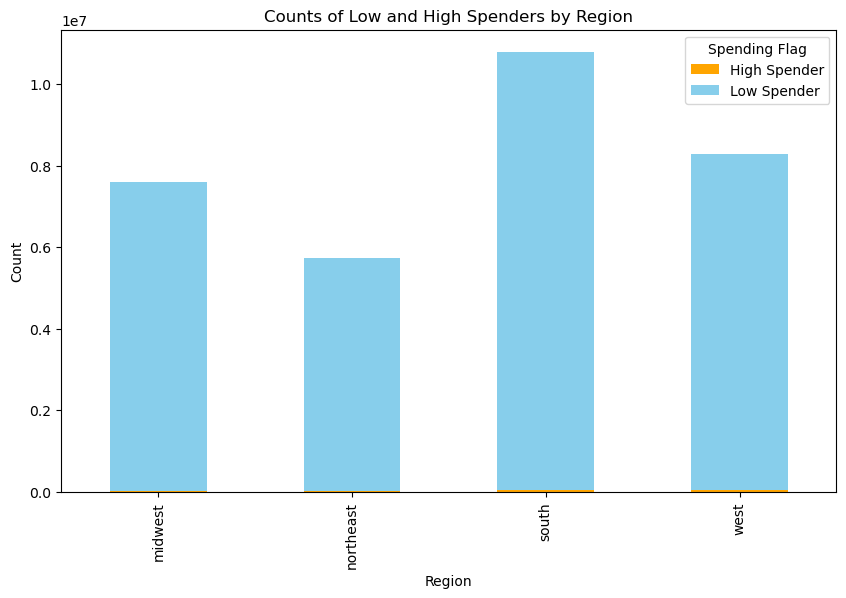

In [19]:
spending_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'skyblue'])

plt.title('Counts of Low and High Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Spending Flag')

plt.show()

In [ ]:
# Frequency of Department by Region

In [21]:
department_by_region_counts = merged_df.groupby('region')['department_id'].value_counts().unstack(fill_value=0)
department_by_region_counts

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
region,,,,,,,,,,,,,,,,,,,,,
midwest,524096,8420,273869,2227937,36186,63736,625574,22355,203769,8193,105749,166129,442101,163551,250702,1264223,175824,98983,673715,245678,16535
northeast,390918,6585,208599,1665839,26542,46891,483418,18601,151816,5802,78815,124620,329445,123574,186755,954026,131485,75139,514675,186817,12374
south,747900,12212,388815,3160551,51624,89142,898940,31269,287444,11533,150350,235752,622436,234251,356015,1796969,243070,143654,957346,349419,23193
west,571829,9074,301145,2424964,39344,69484,680191,25491,223598,9045,112658,182426,481387,181657,274586,1383529,188287,106026,741814,269335,17043


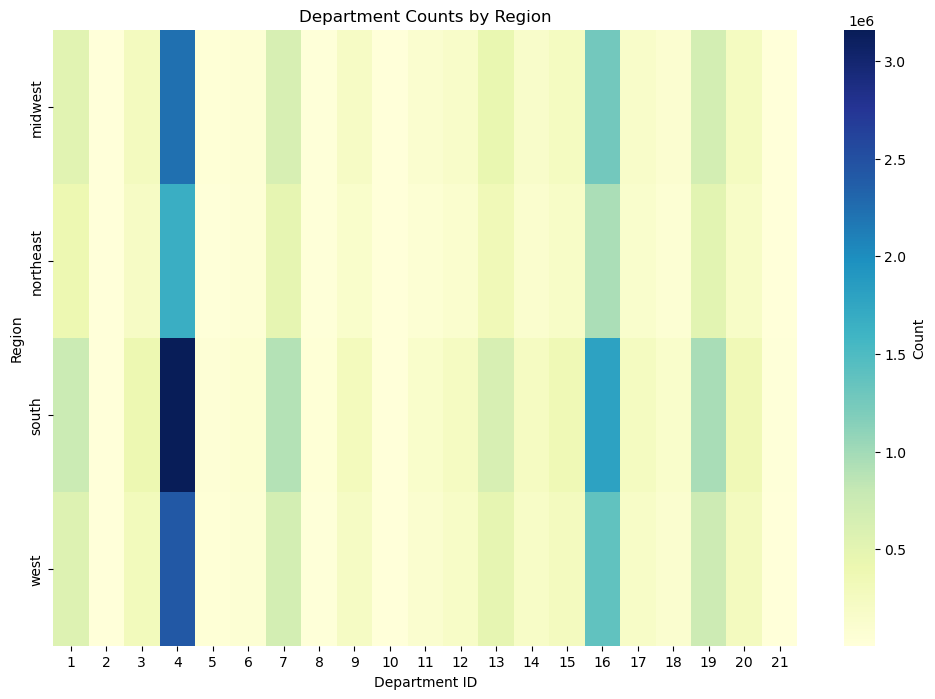

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(department_by_region_counts, annot=False, cmap="YlGnBu", fmt="d", cbar_kws={'label': 'Count'})


# Adding labels and title
plt.title('Department Counts by Region')
plt.xlabel('Department ID')
plt.ylabel('Region')

plt.show()

In [32]:
# Create exclusion flag for low-activity customers

In [34]:
merged_df['low_activity'] = merged_df['order_number'] < 5
low_actvity_customers = merged_df[merged_df['low_activity'] == True]
low_actvity_customers.describe()
#low_activity_customers.to_csv(path, 'Data', 'Prepared Data', 'low_activity_customers.csv', index=False)

,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_spent,med_days_since_order,age,number_dependents,income
count,7.989982e+06,7.989982e+06,7.989982e+06,7.989982e+06,5.913886e+06,7.989982e+06,7.989982e+06,7.989982e+06,7.989982e+06,7.989982e+06,7.988566e+06,7.989982e+06,7.989982e+06,7.989977e+06,7.989982e+06,7.989982e+06,7.989982e+06
mean,1.711617e+06,2.451815e+00,2.711113e+00,1.361676e+01,1.531028e+01,2.562382e+04,8.280233e+00,2.730400e-01,7.125323e+01,9.890717e+00,7.791974e+00,1.644088e+01,7.800047e+00,1.481553e+01,4.948951e+01,1.501572e+00,9.804032e+04
std,9.873833e+05,1.105701e+00,2.107781e+00,4.237708e+00,9.899707e+00,1.410751e+04,7.019481e+00,4.455213e-01,3.815383e+01,6.277762e+00,4.242762e+00,1.693708e+01,8.122262e-01,8.797822e+00,1.848636e+01,1.117930e+00,4.217109e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.548500e+05,1.000000e+00,1.000000e+00,1.100000e+01,7.000000e+00,1.362900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,5.000000e+00,7.337705e+00,7.000000e+00,3.300000e+01,1.000000e+00,6.536700e+04
50%,1.712854e+06,2.000000e+00,2.000000e+00,1.400000e+01,1.300000e+01,2.546600e+04,6.000000e+00,0.000000e+00,8.300000e+01,9.000000e+00,7.300000e+00,1.000000e+01,7.814932e+00,1.200000e+01,4.900000e+01,2.000000e+00,9.599000e+04
75%,2.565686e+06,3.000000e+00,5.000000e+00,1.700000e+01,2.700000e+01,3.802200e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,2.100000e+01,8.278400e+00,2.100000e+01,6.500000e+01,3.000000e+00,1.271080e+05
max,3.421081e+06,4.000000e+00,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [ ]:
# Create parent classifier

In [38]:
merged_df['parent'] = merged_df['number_dependents'] > 0
merged_df['parent'].value_counts()

parent
True     24307356
False     8097503
Name: count, dtype: int64

In [ ]:
# Create single adult classifier

In [40]:
merged_df['single_adult'] = merged_df['number_dependents'] == 0 
merged_df['single_adult'].value_counts()

single_adult
False    24307356
True      8097503
Name: count, dtype: int64

In [42]:
merged_df.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,hours_ranked,max_order,loyalty_flag,avg_spent,spending_flag,med_days_since_order,frequency_flag,first_name,surname,gender,state,age,date_joined,number_dependents,family_status,income,region,low_activity,parent,single_adult
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,True,True,False
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,True,True,False
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,True,True,False
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,True,True,False
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,True,True,False


In [ ]:
# Create "baby supplies" dataframe to capture how many parents and single adults have bought these products

In [272]:
baby_supplies_df = merged_df[merged_df['department_id'] == 18]
baby_supplies_df.head(30)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_dependents,family_status,income,region,low_activity,parent,single_adult
682,280530,9,1,1,17,NaN,45045,17,0,Organic Stage 3 Pumpkin Cranberry Apple Baby Food,...,District of Columbia,79,1/16/2020,3,married,154743,south,True,True,False
683,280530,9,1,1,17,NaN,19627,18,0,Butternut Squash Pear Stage 2 Baby Food,...,District of Columbia,79,1/16/2020,3,married,154743,south,True,True,False
684,280530,9,1,1,17,NaN,43875,19,0,Baby Food Stage 2 Blueberry Pear & Purple Carrot,...,District of Columbia,79,1/16/2020,3,married,154743,south,True,True,False
685,280530,9,1,1,17,NaN,45767,20,0,Sunny Days Strawberry Snack Bars,...,District of Columbia,79,1/16/2020,3,married,154743,south,True,True,False
686,280530,9,1,1,17,NaN,47167,21,0,Organic Sunny Days Apple Snack Bars,...,District of Columbia,79,1/16/2020,3,married,154743,south,True,True,False
713,1830137,9,3,5,12,30.0,45767,7,1,Sunny Days Strawberry Snack Bars,...,District of Columbia,79,1/16/2020,3,married,154743,south,True,True,False
3972,1275838,32,2,3,12,30.0,49215,2,0,Kids Sensible Foods Broccoli Littles,...,Oregon,80,1/1/2017,1,married,112006,west,True,True,False
3980,1275838,32,2,3,12,30.0,38984,10,0,Kale & Spinach Superfood Puffs,...,Oregon,80,1/1/2017,1,married,112006,west,True,True,False
4014,1709286,32,3,2,10,20.0,49215,7,1,Kids Sensible Foods Broccoli Littles,...,Oregon,80,1/1/2017,1,married,112006,west,True,True,False
4042,72626,32,4,3,9,1.0,49215,14,1,Kids Sensible Foods Broccoli Littles,...,Oregon,80,1/1/2017,1,married,112006,west,True,True,False


In [274]:
baby_supplies_df.describe()

,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_spent,med_days_since_order,age,number_dependents,income
count,4.238020e+05,423802.000000,423802.000000,423802.000000,401315.000000,423802.000000,423802.000000,423802.000000,423802.000000,423802.0,423802.000000,423802.000000,423802.000000,423802.000000,423802.000000,423802.000000,423802.000000
mean,1.706348e+06,19.310397,2.711004,13.397596,10.004465,25051.904109,10.575925,0.578971,89.919854,18.0,7.638379,37.881202,7.827073,9.094449,49.302769,1.504172,101809.551279
std,9.869230e+05,18.491463,2.070857,4.427657,8.120835,15345.331983,8.141542,0.493725,8.652528,0.0,3.822208,26.091366,0.578335,6.281620,18.407646,1.119476,39789.806200
min,1.000000e+01,1.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,56.000000,18.0,1.000000,3.000000,1.425000,0.000000,18.000000,0.000000,25991.000000
25%,8.514050e+05,5.000000,1.000000,10.000000,4.000000,10675.000000,5.000000,0.000000,92.000000,18.0,4.700000,17.000000,7.460987,5.000000,34.000000,0.000000,71598.250000
50%,1.704582e+06,13.000000,3.000000,13.000000,7.000000,24834.000000,9.000000,1.000000,92.000000,18.0,7.200000,33.000000,7.824336,7.000000,49.000000,2.000000,98301.000000
75%,2.559106e+06,27.000000,5.000000,16.000000,13.000000,38985.000000,15.000000,1.000000,92.000000,18.0,11.000000,54.000000,8.177548,10.000000,65.000000,3.000000,129617.000000
max,3.421083e+06,99.000000,6.000000,23.000000,30.000000,49583.000000,92.000000,1.000000,102.000000,18.0,15.000000,99.000000,15.706667,30.000000,81.000000,3.000000,579169.000000


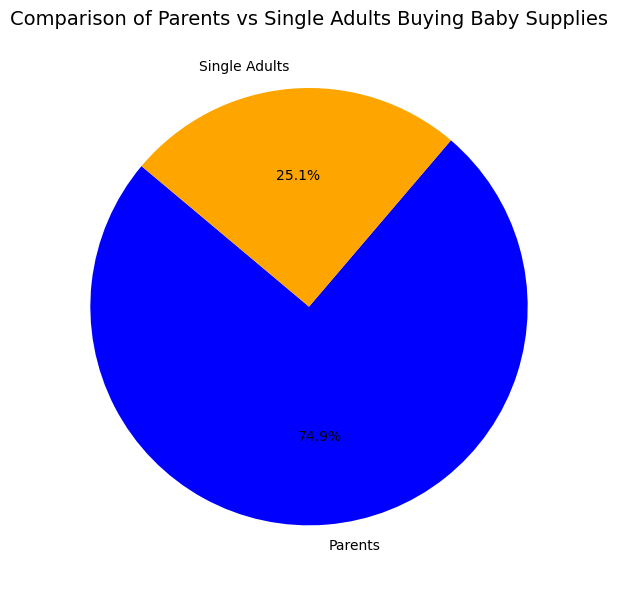

In [276]:
count_parents = baby_supplies_df['parent'].sum()
count_single_adults = baby_supplies_df['single_adult'].sum()



# Create a DataFrame for customization 
comparison_df = pd.DataFrame({
    'Group': ['Parents', 'Single Adults'],
    'Count': [count_parents, count_single_adults]
})

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    comparison_df['Count'], 
    labels=comparison_df['Group'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['blue', 'orange']  
)

plt.title('Comparison of Parents vs Single Adults Buying Baby Supplies', fontsize=14)
plt.tight_layout()
plt.show()

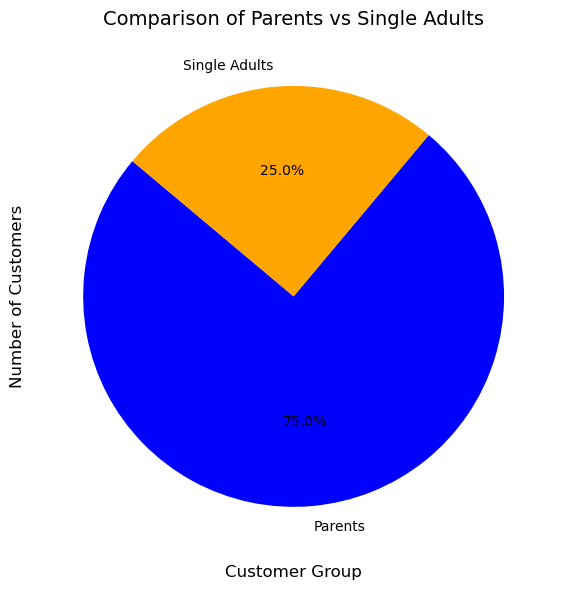

In [278]:

count_parents = merged_df[merged_df['parent'] == True].shape[0]
count_single_adults = merged_df[merged_df['single_adult'] == True].shape[0]

# Create a DataFrame with counts
comparison_df = pd.DataFrame({
    'Group': ['Parents', 'Single Adults'],
    'Count': [count_parents, count_single_adults]
})



plt.figure(figsize=(8, 6))
plt.pie(
    comparison_df['Count'], 
    labels=comparison_df['Group'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['blue', 'orange']  # Example colors; you can adjust as desired
)

plt.title('Comparison of Parents vs Single Adults', fontsize=14)
plt.xlabel('Customer Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)


plt.tight_layout()
plt.show()

In [187]:
# More parents in overall dataset and more parents represented in DF only containting baby supplies as well

In [ ]:
# Create Income classifier

In [17]:
merged_df['income'].median()

96618.0

In [280]:
merged_df['high_income'] = merged_df['income'] > 96000
merged_df['high_income'].value_counts()

high_income
True     16469421
False    15935438
Name: count, dtype: int64

In [ ]:
# Count of customers that are high income

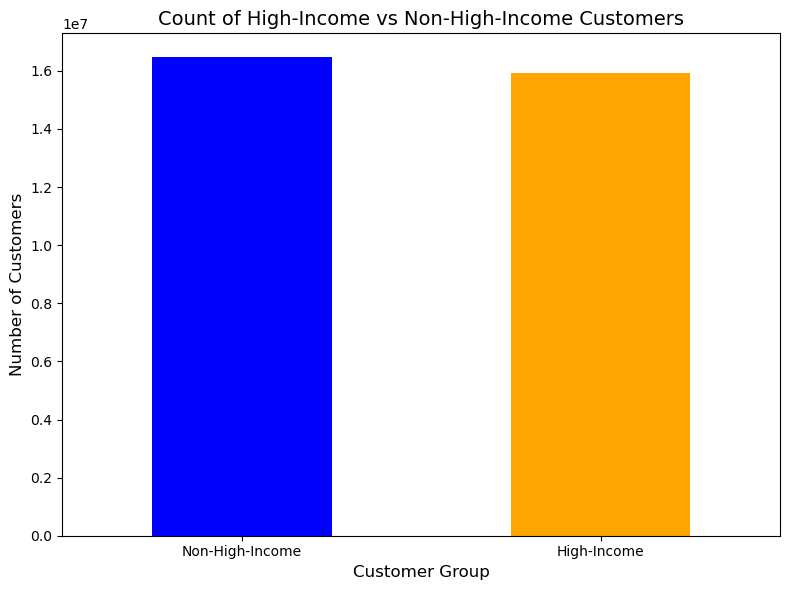

In [282]:
merged_df['high_income'].value_counts().plot.bar(color=['blue', 'orange'], figsize=(8, 6))

plt.title('Count of High-Income vs Non-High-Income Customers', fontsize=14)
plt.xlabel('Customer Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-High-Income', 'High-Income'], rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# High income vs non-high income customers are almost equivalent

In [ ]:
# Departments that high income customers usually spend in

C:\Users\Zachu\AppData\Local\Temp\ipykernel_13736\2643079297.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=department_customer_count, x='department_name', y='customer_count', palette='Set2')


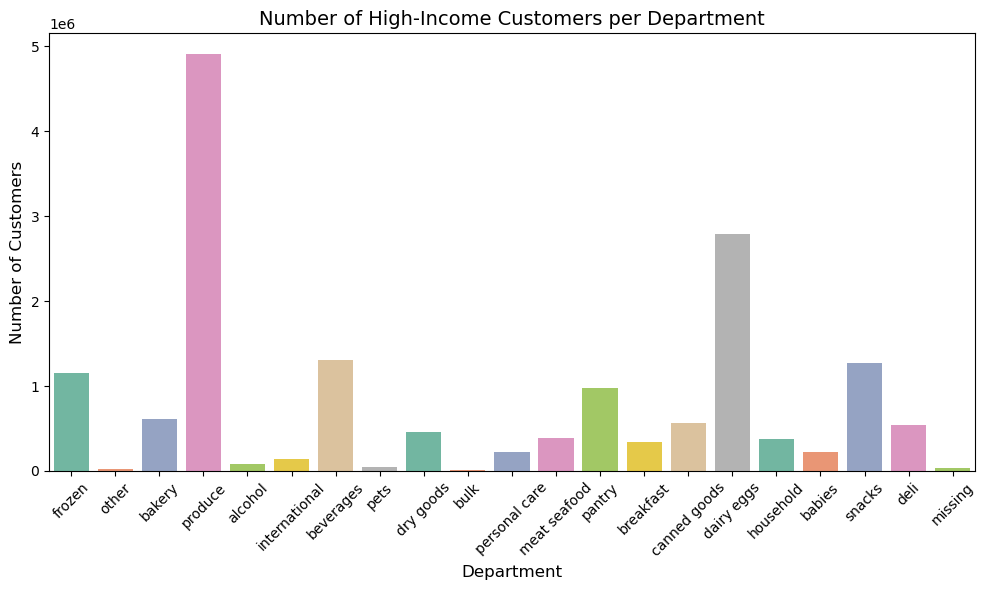

In [284]:
high_income_customer_df = merged_df[merged_df['high_income'] == True]
department_customer_count = high_income_customer_df.groupby('department_id').size().reset_index(name='customer_count')

department_names = {
    1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol',
    6: 'international', 7: 'beverages', 8: 'pets', 9: 'dry goods', 10: 'bulk',
    11: 'personal care', 12: 'meat seafood', 13: 'pantry', 14: 'breakfast', 15: 'canned goods',
    16: 'dairy eggs', 17: 'household', 18: 'babies', 19: 'snacks', 20: 'deli',
    21: 'missing'
}

# Map department IDs to department names
department_customer_count['department_name'] = department_customer_count['department_id'].map(department_names)


plt.figure(figsize=(10, 6))
sns.barplot(data=department_customer_count, x='department_name', y='customer_count', palette='Set2')


plt.title('Number of High-Income Customers per Department', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)  # Rotate department labels if necessary


plt.tight_layout()
plt.show()



In [ ]:
# Departments that regular-income customers usually spend in

C:\Users\Zachu\AppData\Local\Temp\ipykernel_13736\3784844347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=department_customer_count, x='department_name', y='customer_count', palette='Set2')


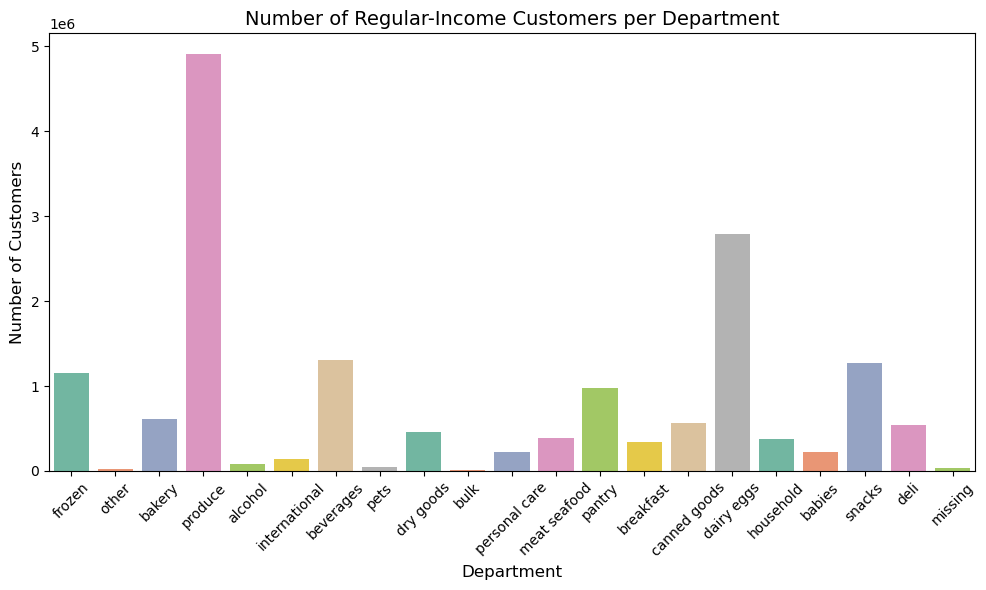

In [286]:
Non_high_income_customer_df = merged_df[merged_df['high_income'] == False]
department_customer_count_2 = Non_high_income_customer_df.groupby('department_id').size().reset_index(name='customer_count')

plt.figure(figsize=(10, 6))
sns.barplot(data=department_customer_count, x='department_name', y='customer_count', palette='Set2')


plt.title('Number of Regular-Income Customers per Department', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)  # Rotate department labels if necessary


plt.tight_layout()
plt.show()


In [ ]:
# Spending patterns seem to be identical

In [ ]:
# Create and export high spender Data Set to evluate these specific customers 

In [219]:
merged_df['high_spender'] = merged_df['avg_spent'] > merged_df['avg_spent'].mean()
high_spender_df = merged_df[merged_df['high_spender'] == True]
high_spender_df.head(5)
high_spender_df.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_spender_df.pkl'))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_dependents,family_status,income,region,low_activity,parent,single_adult,high_income,high_spender
254,1374495,3,1,1,14,NaN,9387,1,0,Granny Smith Apples,...,7/28/2017,3,married,93240,west,True,True,False,False,True
255,1374495,3,1,1,14,NaN,17668,2,0,Unsweetened Chocolate Almond Breeze Almond Milk,...,7/28/2017,3,married,93240,west,True,True,False,False,True
256,1374495,3,1,1,14,NaN,15143,3,0,Blueberry Pint,...,7/28/2017,3,married,93240,west,True,True,False,False,True
257,1374495,3,1,1,14,NaN,16797,4,0,Strawberries,...,7/28/2017,3,married,93240,west,True,True,False,False,True
258,1374495,3,1,1,14,NaN,39190,5,0,Vanilla Unsweetened Almond Milk,...,7/28/2017,3,married,93240,west,True,True,False,False,True


In [ ]:
# Create popular day and popular hour flags based on data above

In [250]:
merged_df['popular_day'] = merged_df['order_dow'].isin([0,1,6]) 

In [252]:
merged_df['popular_hour'] = merged_df['order_hour_of_day'].between(0, 16)

In [ ]:
# Create irregular customer flag

In [242]:
merged_df['irregular_customer'] = ~(merged_df['popular_day'] & merged_df['popular_hour'])
merged_df['irregular_customer'].value_counts()

irregular_customer
True     19775845
False    12629014
Name: count, dtype: int64

In [ ]:
# Create irregular customer dataframe

In [246]:
irregular_customer_df = merged_df[
    (merged_df['order_dow'] != merged_df['popular_day']) & 
    (merged_df['order_hour_of_day'] != merged_df['popular_hour'])
]
irregular_customer_df.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,region,low_activity,parent,single_adult,high_income,high_spender,popular_day,popular_hour,irregular_customer
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,south,True,True,False,False,False,False,True,True
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,40423,south,True,True,False,False,False,False,True,True
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,40423,south,True,True,False,False,False,False,True,True
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,40423,south,True,True,False,False,False,False,True,True
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,40423,south,True,True,False,False,False,False,True,True


In [248]:
irregular_customer_df.describe()

,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_spent,med_days_since_order,age,number_dependents,income
count,2.664721e+07,2.664721e+07,2.664721e+07,2.664721e+07,2.493428e+07,2.664721e+07,2.664721e+07,2.664721e+07,2.664721e+07,2.664721e+07,2.664303e+07,2.664721e+07,2.664721e+07,2.664721e+07,2.664721e+07,2.664721e+07,2.664721e+07
mean,1.710961e+06,1.711397e+01,3.106679e+00,1.353835e+01,1.105791e+01,2.559595e+04,8.336138e+00,5.867286e-01,7.119882e+01,9.908636e+00,7.797554e+00,3.298077e+01,7.799001e+00,1.040812e+01,4.948948e+01,1.502349e+00,9.968037e+04
std,9.873725e+05,1.752442e+01,2.125358e+00,4.200931e+00,8.498980e+00,1.408342e+04,7.106348e+00,4.924207e-01,3.817703e+01,6.278916e+00,4.131681e+00,2.514805e+01,8.776135e-01,6.880852e+00,1.848518e+01,1.118354e+00,4.294717e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.563350e+05,5.000000e+00,2.000000e+00,1.000000e+01,5.000000e+00,1.354100e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387860e+00,6.000000e+00,3.400000e+01,1.000000e+00,6.738000e+04
50%,1.711358e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.532000e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.816801e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.680100e+04
75%,2.565889e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794000e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.233380e+00,1.300000e+01,6.600000e+01,3.000000e+00,1.281180e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [ ]:
merged_df.columns

In [254]:
merged_df.describe()

,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_spent,med_days_since_order,age,number_dependents,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,1.110409e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790993e+00,3.305217e+01,7.790992e+00,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,8.378570e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.100926e+00,2.515525e+01,1.020499e+00,7.032845e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.378488e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.811941e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.229327e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [ ]:
# Create age variables based on age brackets

In [21]:
merged_df['youth'] = merged_df['age'] <= 25
merged_df['middle_aged'] = (merged_df['age']) > 25 & (merged_df['age'] <= 60)
merged_df['eldery'] = merged_df['age'] >= 61

In [ ]:
# Creating a bar chart

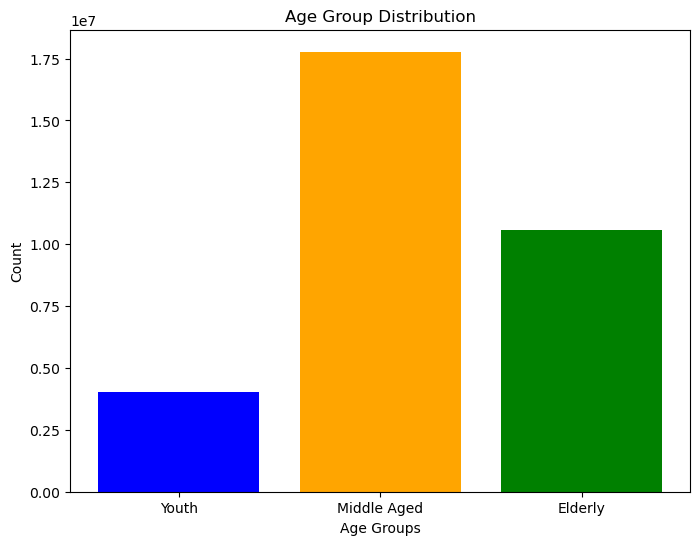

In [23]:
# Counting the number of individuals in each group
age_groups = {
    'Youth': merged_df['youth'].sum(),
    'Middle Aged': merged_df['middle_aged'].sum(),
    'Elderly': merged_df['elderly'].sum()
}

plt.figure(figsize=(8, 6))
plt.bar(age_groups.keys(), age_groups.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()
